In [5]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats
from ram.analysis.combo_search import CombinationSearch
from ram.utils.time_funcs import convert_date_array

In [2]:
RunManager.get_strategies()

['BirdsStrategy',
 'GapStrategy',
 'IntradayReversion',
 'LongPeadStrategy',
 'MomentumStrategy',
 'ReversionStrategy',
 'StatArbStrategy',
 'VictorStrategy']

In [29]:
print(RunManager.get_run_names('IntradayReversion'))

         Run                                        Description
0   run_0002                       zLim dwn up Pred fit Samples
1   run_0003                               RF Classifier params
2   run_0004                             Target Stopl Loss Lits
3   run_0005                               RF Classifier Iter 2
4   run_0007                       Rev zLim up down signal lims
5   run_0008                                Rev only RFC Params
6   run_0009                          Rev Only Stop Target Lims
7   run_0010                             RevMo Mixed Param Iter
8   run_0011                             RevMo All Params z .35
9   run_0012                        mitch: first run with main2
10  run_0013                           mitch: main2 more params
11  run_0014                         mitch: main2 running on PC
12  run_0015                                         Rand Preds
13  run_0016                              Non-Rand Pred Control
14  run_0017                            

In [30]:
rm1 = RunManager('IntradayReversion', 'run_0038', test_periods=0)
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,participation_IWM,participation_QQQ,participation_SPY,participation_VXX,total_return_IWM,total_return_QQQ,total_return_SPY,total_return_VXX,win_percent_IWM,win_percent_QQQ,win_percent_SPY,win_percent_VXX
0,IWM,"[0.01, 0.002]",144,0.149651,0.025406,0.436208,0.449856,0.580855,0.543041,-0.018259,0.105805,0.214834,0.296411,0.217880,0.329190,0.364687,0.514538
1,IWM,"[0.01, 0.004]",144,0.168077,0.026570,0.436208,0.449856,0.580855,0.543041,0.055483,0.105805,0.214834,0.296411,0.352557,0.329190,0.364687,0.514538
2,QQQ,"[0.01, 0.002]",144,0.139875,0.023664,0.436208,0.449856,0.580855,0.543041,0.018612,0.029829,0.214834,0.296411,0.285218,0.259398,0.364687,0.514538
3,QQQ,"[0.01, 0.004]",144,0.177853,0.028312,0.436208,0.449856,0.580855,0.543041,0.018612,0.181781,0.214834,0.296411,0.285218,0.398981,0.364687,0.514538
4,SPY,"[0.01, 0.002]",144,0.167836,0.027879,0.436208,0.449856,0.580855,0.543041,0.018612,0.105805,0.250703,0.296411,0.285218,0.329190,0.300093,0.514538
5,SPY,"[0.01, 0.004]",144,0.149892,0.024097,0.436208,0.449856,0.580855,0.543041,0.018612,0.105805,0.178965,0.296411,0.285218,0.329190,0.429282,0.514538
6,VXX,"[0.01, 0.007]",144,0.163258,0.027556,0.436208,0.449856,0.580855,0.543041,0.018612,0.105805,0.214834,0.313987,0.285218,0.329190,0.364687,0.478949
7,VXX,"[0.01, 0.01]",144,0.154470,0.024420,0.436208,0.449856,0.580855,0.543041,0.018612,0.105805,0.214834,0.278834,0.285218,0.329190,0.364687,0.550126
8,gap_down_limit,0.25,288,0.158864,0.025988,0.436208,0.449856,0.580855,0.543041,0.018612,0.105805,0.214834,0.296411,0.285218,0.329190,0.364687,0.514538
9,gap_up_limit,0.25,288,0.158864,0.025988,0.436208,0.449856,0.580855,0.543041,0.018612,0.105805,0.214834,0.296411,0.285218,0.329190,0.364687,0.514538


In [27]:
comb = CombinationSearch()
comb.add_run(rm1)
comb.start(criteria='mean', epochs=4)


  0%|                                                                   | 0/4 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████| 4/4 [01:07<00:00, 16.87s/it]


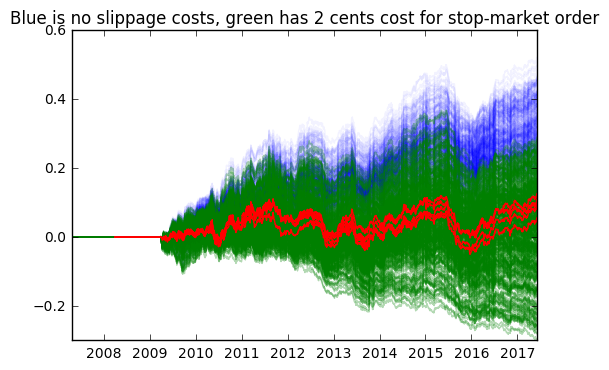

In [28]:
plt.figure()
plt.plot(rm1.returns.cumsum(), alpha=0.30)
plt.plot(comb.best_results_rets.cumsum(), 'r')
plt.title('Blue is no slippage costs, green has 2 cents cost for stop-market order')

In [ ]:
comb.best_results_rets.sum()